# FINAL PROJECT SUBMISSION

- Student Name: Ian Korir
- Student Pase: Fulltime-Hybrid student
- Scheduled Project Review: 22/03/2024
- Instructor Name: Nikita Njoroge
- Blog Post: 

# Introduction
## Overview
Business Problem:
Viusasa new movie studio aims to establish itself as a leading player in the entertainment industry by producing high-quality and commercially successful movies. However, the studio faces the challenge of navigating the complexities of the movie market to ensure its productions resonate with audiences and generate significant revenue.


Problem Statement: How can Viusasa's new movie studio strategically optimize its production and release strategy to maximize box office success and audience satisfaction?

## Objectives
Key Objectives:
1.	Identify the most profitable and audience-friendly movie genres to prioritize in production efforts.
2.	Determine the optimal timing for movie releases to maximize audience turnout and box office revenue.
3.	Enhance audience engagement and satisfaction by aligning movie offerings with audience preferences and expectations.

## The Data
The datasets are stored in the 'zippedData' folder which were sourced from:
1.	Box Office MojoLinks : 
	bom.movie_gross.csv
2.	IMDBLinks : 
	im.db
3.	Rotten TomatoesLinks : 
	rt.movie_info.tsv
4.	TheMovieDBLinks : 
	tmdb.movies.csv
5.	The Numbers :
	tn.movie_budgets.csv




## Import relevant libraries


In [43]:
#importing libraries
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt

In [44]:
# read movie budget csv file
movie_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

# get summary of the dataframe
movie_budget.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Check for missing values

In [45]:
# check for missing values
movie_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

Clean data by changing data type to float

In [46]:
#Cast to numeric data type
movie_budget['production_budget'] = movie_budget['production_budget'].replace('[^.0-9]', '', regex=True).astype('float32')
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].replace('[^.0-9]', '', regex=True).astype('float32')
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].replace('[^.0-9]', '',regex = True).astype('float64')
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507648.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762352.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09


The release date is an object, in order to filter the years convert to date time.

In [47]:
#converting release data object to dateTime
movie_budget['release_date'] = pd.to_datetime(movie_budget['release_date'], errors='coerce')
movie_budget['year'] = movie_budget['release_date'].dt.strftime('%Y')
movie_budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507648.0,2.776345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762352.0,1.497624e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09,2015
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,2018
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000.0,309420416.0,9.634204e+08,2007
8,9,2017-11-17,Justice League,300000000.0,229024288.0,6.559452e+08,2017
9,10,2015-11-06,Spectre,300000000.0,200074176.0,8.796209e+08,2015


Finding the percentage profits of the movies based on the production budget and the world wide gross.

In [48]:
# calculate the profits or loss for each movie
movie_budget['profit/loss'] = movie_budget['worldwide_gross'] - movie_budget['production_budget']

# Calculate profit/loss as a percentage
movie_budget['profit/loss_percentage'] = (movie_budget['profit/loss'] / movie_budget['production_budget']) * 100

movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,profit/loss,profit/loss_percentage
0,1,2009-12-18,Avatar,425000000.0,760507648.0,2.776345e+09,2009,2.351345e+09,553.257713
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,2011,6.350639e+08,154.667286
2,3,2019-06-07,Dark Phoenix,350000000.0,42762352.0,1.497624e+08,2019,-2.002376e+08,-57.210757
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,2015,1.072414e+09,324.384139
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09,2017,9.997217e+08,315.369636


Check movies with the highest profit

In [49]:
# Group by 'year' and 'movie', summing the profits for each group
profit_by_year_movie = movie_budget.groupby(['year', 'movie'])['profit/loss'].sum().reset_index()

# Sort the DataFrame by profit in descending order for each year
sorted_profit_by_year_movie = profit_by_year_movie.sort_values(by=['year', 'profit/loss'], ascending=[False, False])

# Display the top 10 highest profit movies for each year
top_10_profit_by_year_movie = sorted_profit_by_year_movie.groupby('year').head(10)
#top_10_profit_by_year_movie

# Filter the data to include years from 2011 to the present
filtered_data = top_10_profit_by_year_movie[top_10_profit_by_year_movie['year'] >= '2011']
filtered_data


,year,movie,profit/loss
5779,2020,Hannibal the Conqueror,-50000000.0
5778,2020,Call of the Wild,-82000000.0
5780,2020,Moonfall,-150000000.0
5722,2019,Captain Marvel,948061550.0
5714,2019,Aladdin,437234314.0
...,...,...,...
3969,2011,Kung Fu Panda 2,514837547.0
4061,2011,The Hangover Part II,506464305.0
3923,2011,Fast Five,505163454.0
4079,2011,The Smurfs,453749323.0


graph showing the  profit and loss for movies between years 2019 and 2020,

h:\MORINGA\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
h:\MORINGA\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
h:\MORINGA\anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


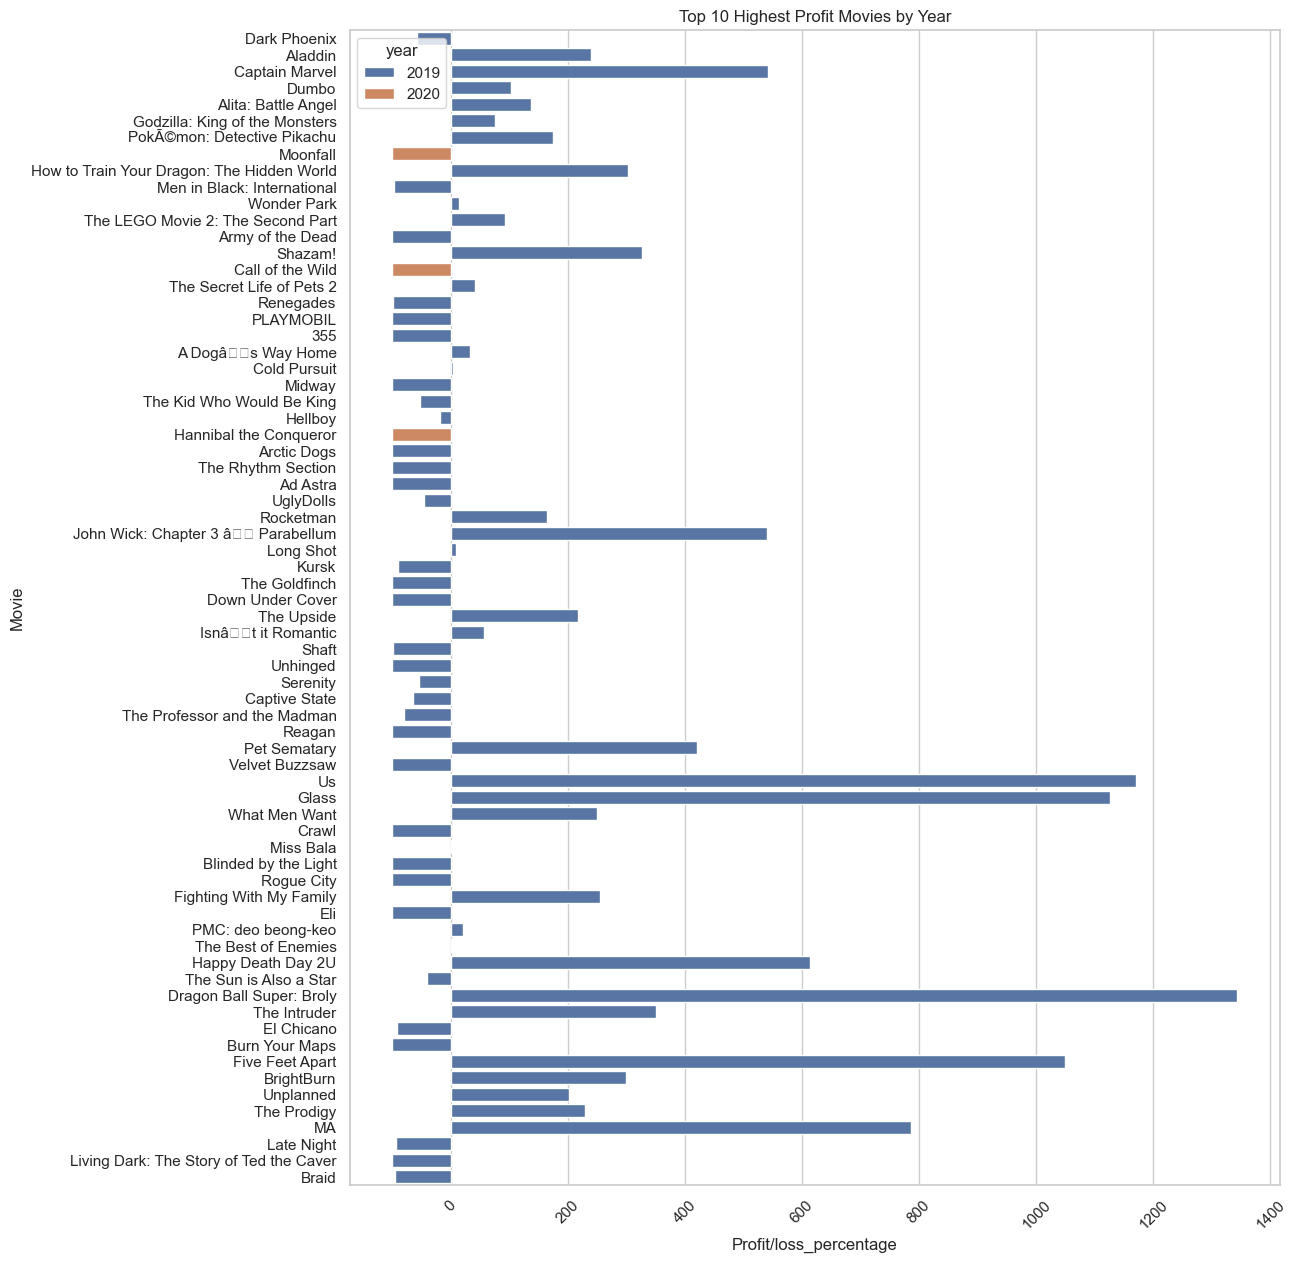

In [57]:
import seaborn as sns
# Filter the data for the years 2020 and 2019
filtered_data = movie_budget[(movie_budget['year'] >= '2019')]

# Set the style of the plot
sns.set(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(12, 15))

# Plot the data using seaborn's barplot
sns.barplot(data=filtered_data, x='profit/loss_percentage', y='movie', hue='year', dodge=False)

# Set the title and labels
plt.title('Top 10 Highest Profit Movies by Year')
plt.xlabel('Profit/loss_percentage')
plt.ylabel('Movie')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


Calculating the review ratings of movies using the IMDB Dataset

In [71]:
# connect to sql database
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor() 

Find table names in the database

In [73]:
table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""

pd.read_sql(table_name_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


There are 8 tables in the database. We are highly interested in the movie_basics  and the movie_ratings tables in order to draw our conclusions on highly rated movie genres

In [74]:
# query data from music basics table
movie_basics = """SELECT *
                    FROM movie_basics;"""

pd.read_sql(movie_basics, conn).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [76]:
# query data from movie ratings table
movie_ratings = """SELECT * 
                    FROM movie_ratings;
                    """
pd.read_sql(movie_ratings, conn).head(10)
                    

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


Join the two table by the movie ID that  is common to both tables.

In [77]:
ratings = """SELECT primary_title, movie_id, start_year, runtime_minutes, genres, averagerating, numvotes
                FROM movie_basics
                JOIN movie_ratings
                USING(movie_id)
                LIMIT 10
                ;"""

pd.read_sql_query(ratings, conn)

,primary_title,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,tt0063540,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,tt0066787,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,tt0069049,2018,122.0,Drama,6.9,4517
3,Sabse Bada Sukh,tt0069204,2018,NaN,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,tt0100275,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,Bigfoot,tt0112502,2017,NaN,"Horror,Thriller",4.1,32
6,Joe Finds Grace,tt0137204,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,Pál Adrienn,tt0146592,2010,136.0,Drama,6.8,451
8,So Much for Justice!,tt0154039,2010,100.0,History,4.6,64
9,Cooper and Hemingway: The True Gen,tt0159369,2013,180.0,Documentary,7.6,53


Looking into the movie akas table

In [89]:
movie_akas = """SELECT * 
                FROM movie_akas
                ;"""

pd.read_sql_query(movie_akas, conn) 

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


Looking at the movie info dataset

In [80]:
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter ='\t', encoding='unicode_escape' )
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [82]:
#checking missing values in the dataframe
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [87]:
# drop missing null values
movie_info.dropna(inplace = True) 

In [85]:
#summary of the datadrame
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [88]:
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures


In [92]:
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [93]:
# drop null values
movie_gross.dropna(inplace=True)

In [95]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [99]:
# rename column title to movie
movie_gross.rename(columns={'title':'movie'}, inplace=True)
movie_gross

,movie,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


## Merge datasets

Merging the movie budget and movie gross tables

In [104]:
budget_and_gross = movie_budget.merge(movie_gross, how = 'inner', on ='movie')

In [103]:
budget_and_gross

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,year_x,profit/loss,profit/loss_percentage,studio,domestic_gross_y,foreign_gross,year_y
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09,2011,6.350639e+08,154.667286,BV,241100000.0,804600000,2011
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09,2015,1.072414e+09,324.384139,BV,459000000.0,946400000,2015
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815488.0,2.048134e+09,2018,1.748134e+09,582.711400,BV,678800000.0,"1,369.5",2018
3,9,2017-11-17,Justice League,300000000.0,229024288.0,6.559452e+08,2017,3.559452e+08,118.648403,WB,229000000.0,428900000,2017
4,10,2015-11-06,Spectre,300000000.0,200074176.0,8.796209e+08,2015,5.796209e+08,193.206974,Sony,200100000.0,680600000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078,50,2010-10-29,Monsters,500000.0,237301.0,5.639730e+06,2010,5.139730e+06,1027.946000,Magn.,237000.0,4000000,2010
1079,17,2001-07-27,Jackpot,400000.0,44452.0,4.445200e+04,2001,-3.555480e+05,-88.887000,DR,800.0,1100000,2014
1080,74,2011-10-28,Like Crazy,250000.0,3395391.0,3.728400e+06,2011,3.478400e+06,1391.360000,ParV,3400000.0,336000,2011
1081,48,2011-07-22,Another Earth,175000.0,1321194.0,2.102779e+06,2011,1.927779e+06,1101.588000,FoxS,1300000.0,456000,2011
